# WEEK 8 : VISUALIZETIMESERIES

visualizing time series data
Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.

Create two bar graphs of the power consumption per hour.

One bar graph has 24 bars; each bar is the average across all days for that hour​
one bar graph has 24*(number of days) bars. Your choice of average or sum for each hour. Label the y-axis appropriately.

In [1]:
!python --version

Python 3.11.5


In [2]:
import pandas as pd
from datetime import datetime

#READING EXCEL 1  DATA 
df1=pd.read_csv(r"RollingSystemDemand_20231024_1.csv")
df1.head()


,HDR,ROLLING SYSTEM DEMAND
VD,20231014000000,21701.0
VD,20231014000500,21727.0
VD,20231014001000,21770.0
VD,20231014001500,21752.0
VD,20231014002000,21703.0


In [3]:
df1.tail()
# LAST COLUMN HAS UNNESSARY DATE AND NEED TO EXCLUDE

,HDR,ROLLING SYSTEM DEMAND
VD,20231014234000,23563.0
VD,20231014234500,23557.0
VD,20231014235000,23444.0
VD,20231014235500,23396.0
FTR,288,NaN


In [4]:
df2=pd.read_csv(r'RollingSystemDemand_20231024_2.csv')
df2.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20231007000000,22839.0
VD,20231007000500,23204.0
VD,20231007001000,23283.0
VD,20231007001500,23180.0
VD,20231007002000,23129.0


In [5]:
df2.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20231007234000,20143.0
VD,20231007234500,20163.0
VD,20231007235000,20058.0
VD,20231007235500,19997.0
FTR,288,NaN


In [6]:
#excluding last column from df1
df1 = df1.iloc[:-1]
df2 = df2.iloc[:-1]

In [7]:
df1.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20231014233500,23508.0
VD,20231014234000,23563.0
VD,20231014234500,23557.0
VD,20231014235000,23444.0
VD,20231014235500,23396.0


In [8]:
df2.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20231007233500,20136.0
VD,20231007234000,20143.0
VD,20231007234500,20163.0
VD,20231007235000,20058.0
VD,20231007235500,19997.0


In [9]:
#concatenating of df1 and df2
df=pd.concat([df1,df2])
df.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20231014000000,21701.0
VD,20231014000500,21727.0
VD,20231014001000,21770.0
VD,20231014001500,21752.0
VD,20231014002000,21703.0


In [10]:
df

,HDR,ROLLING SYSTEM DEMAND
VD,20231014000000,21701.0
VD,20231014000500,21727.0
VD,20231014001000,21770.0
VD,20231014001500,21752.0
VD,20231014002000,21703.0
...,...,...
VD,20231007233500,20136.0
VD,20231007234000,20143.0
VD,20231007234500,20163.0
VD,20231007235000,20058.0


In [11]:
# using HDR column, creating Date_and_Time column
df['Date_And_Time'] = pd.to_datetime(df['HDR'], format='%Y%m%d%H%M%S', errors='coerce')
df

,HDR,ROLLING SYSTEM DEMAND,Date_And_Time
VD,20231014000000,21701.0,2023-10-14 00:00:00
VD,20231014000500,21727.0,2023-10-14 00:05:00
VD,20231014001000,21770.0,2023-10-14 00:10:00
VD,20231014001500,21752.0,2023-10-14 00:15:00
VD,20231014002000,21703.0,2023-10-14 00:20:00
...,...,...,...
VD,20231007233500,20136.0,2023-10-07 23:35:00
VD,20231007234000,20143.0,2023-10-07 23:40:00
VD,20231007234500,20163.0,2023-10-07 23:45:00
VD,20231007235000,20058.0,2023-10-07 23:50:00


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, VD to VD
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   HDR                    576 non-null    int64         
 1   ROLLING SYSTEM DEMAND  576 non-null    float64       
 2   Date_And_Time          576 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 18.0+ KB


<Axes: xlabel='Date_And_Time'>

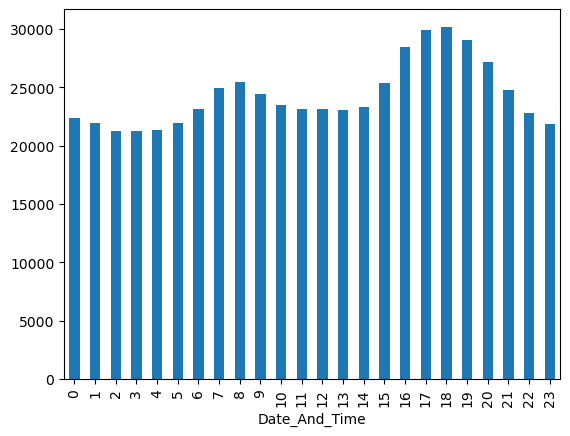

In [13]:
#Calculate average power consumption at each hour for all the days
df.groupby(df['Date_And_Time'].dt.hour)['ROLLING SYSTEM DEMAND'].mean().plot(kind = 'bar')

In [14]:
df.groupby([df['Date_And_Time'].dt.day,df['Date_And_Time'].dt.hour])['ROLLING SYSTEM DEMAND'].mean().plot(kind = 'bar',figsize=(100,100))

<Axes: xlabel='Date_And_Time,Date_And_Time'>